In [11]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import glob 
from astropy.io import fits 
import warnings
warnings.filterwarnings('ignore')

In [12]:
filter_used = 'j_flat'
path = '/Users/jessicaschonhut/flares_paper/keck_obs/' + filter_used + '/'

### Average lamp on images 

In [13]:
lamp_on = glob.glob(path + 'lamp_on/*.fits')

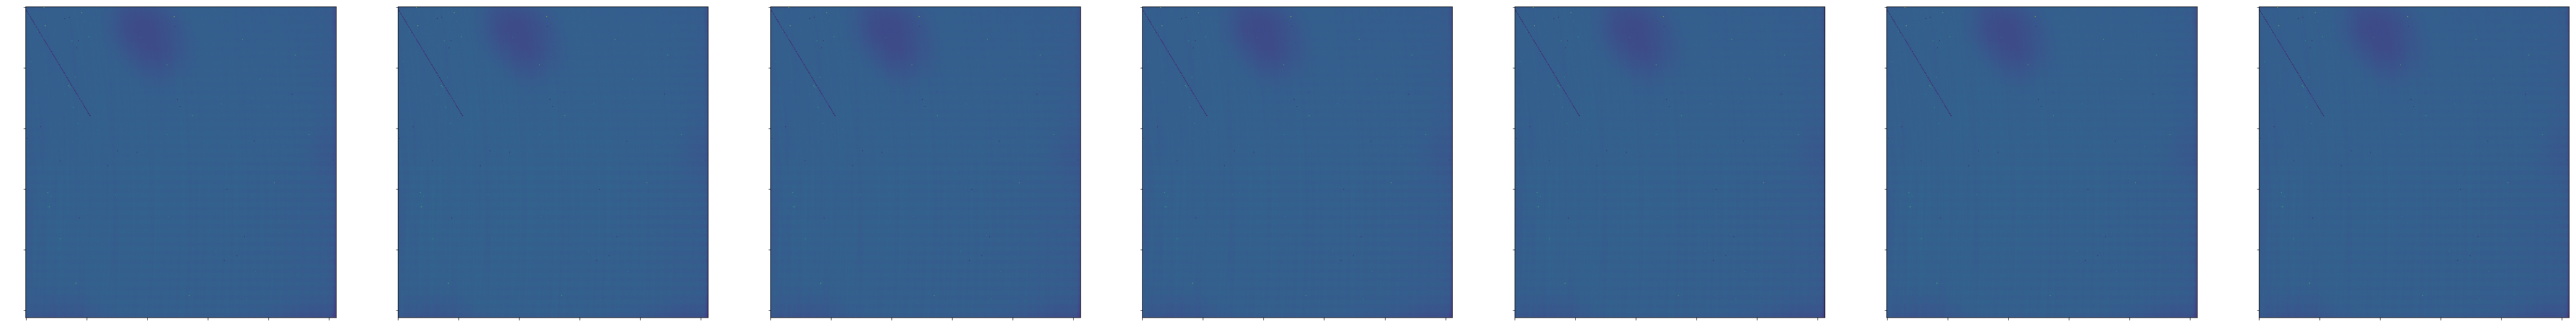

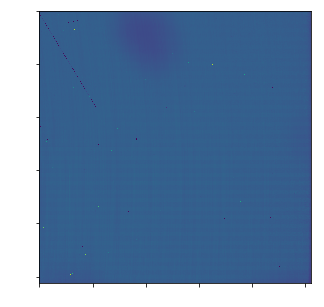

In [14]:
x = np.linspace(1, len(lamp_on), len(lamp_on))
plt.figure(figsize=((len(x)*10), 10))
averaged_lamp_on = np.zeros((1024, 1024))
for z in x:
    on = fits.open(lamp_on[int(z-1)], ignore_missing_end=True)
    on = on[0].data
    plt.subplot(1,len(x),int(z))
    plt.xticks(color='white')
    plt.yticks(color='white')
    plt.imshow(on)
    averaged_lamp_on = np.add(averaged_lamp_on, on)
averaged_lamp_on = np.divide(averaged_lamp_on, len(lamp_on))
plt.figure(figsize=(5, 5))
plt.xticks(color='white')
plt.yticks(color='white')
plt.imshow(averaged_lamp_on)

### Average lamp off images

In [15]:
lamp_off = glob.glob(path + 'lamp_off/*.fits')

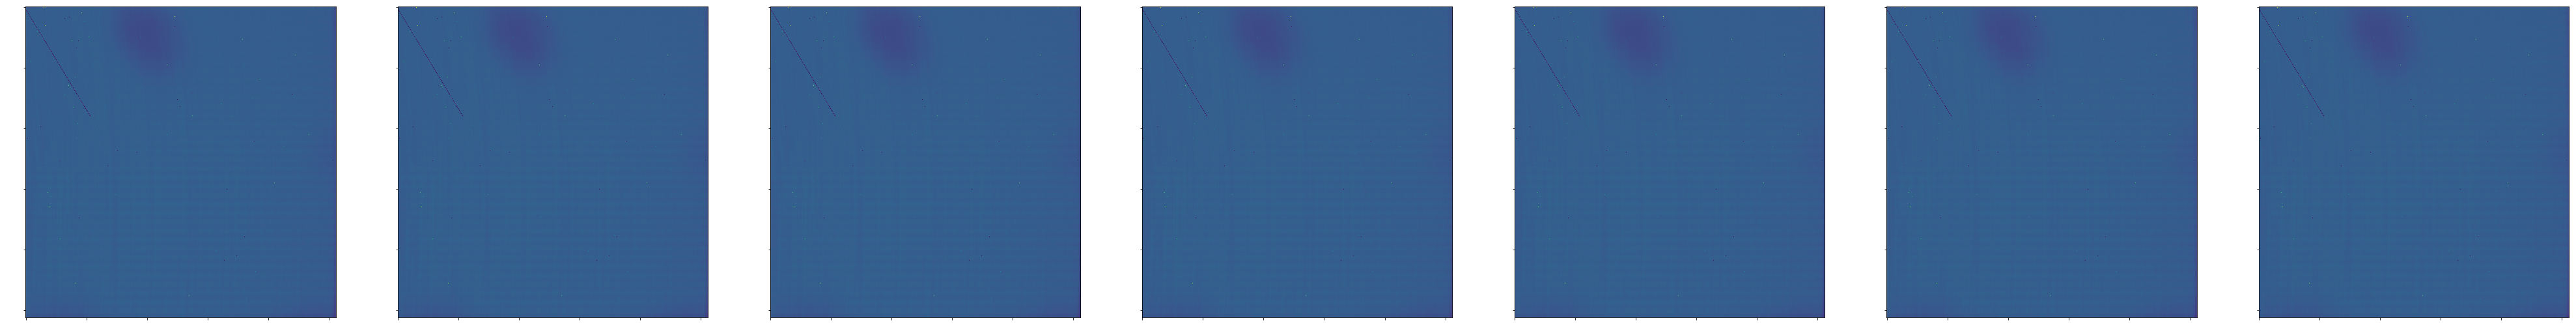

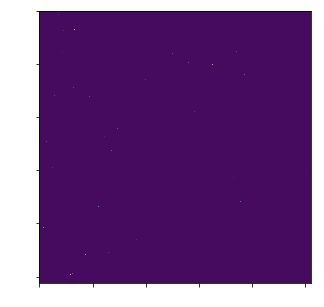

In [16]:
x = np.linspace(1, len(lamp_off), len(lamp_off))
plt.figure(figsize=((len(x)*10), 10))
averaged_lamp_off = np.zeros((1024, 1024))
for z in x:
    off = fits.open(lamp_off[int(z-1)], ignore_missing_end=True)
    off = off[0].data
    plt.subplot(1,len(x),int(z))
    plt.xticks(color='white')
    plt.yticks(color='white')
    plt.imshow(on)
    averaged_lamp_off = np.add(averaged_lamp_off, off)
averaged_lamp_off = np.divide(averaged_lamp_off, len(lamp_off))
plt.figure(figsize=(5, 5))
plt.xticks(color='white')
plt.yticks(color='white')
plt.imshow(averaged_lamp_off)

### Find the difference in lamp on and lamp off images 

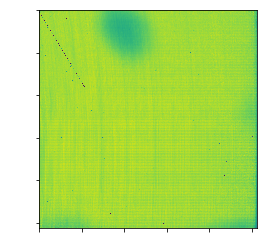

In [17]:
lamp_difference = averaged_lamp_on - averaged_lamp_off
plt.xticks(color='white')
plt.yticks(color='white')
plt.imshow(lamp_difference)

### Normalize the difference to create final flat

In [18]:
final_flat = lamp_difference / np.median(lamp_difference)

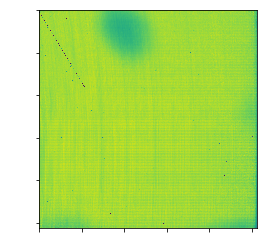

In [19]:
plt.xticks(color='white')
plt.yticks(color='white')
plt.imshow(final_flat)

In [20]:
hdu = fits.PrimaryHDU(final_flat)
hdul = fits.HDUList([hdu])
hdul.writeto(path + 'final_flat.fits')